# H&M Retail Sales Analysis
---

# --------- Sprint 1 -----------

# Import Packages and Load data
There are three tables within this [Kaggle dataset](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data?select=transactions_train.csv):
- `articles`: Detailed metadata for each article_id (product) available for purchase.
- `customers`: metadata for each customer_id in dataset.
- `transactions`: The purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from statsmodels.regression import linear_model
# import statsmodels.api as sm
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=(5,3.5)

In [3]:
articles = pd.read_csv('data/articles.csv')

In [4]:
customers = pd.read_csv('data/customers.csv')

In [5]:
transactions = pd.read_csv('data/transactions_train.csv')

---

# Data Cleaning

As a data analyst, I want to conduct data preprocessing on the H&M Sales data in order to better identify quality issues, and feature engineering opportunities, and to have further observations about the data: 
- Looking individually into the 3 tables for preprocessing.
- Drop columns that might fall out of scope for this project.
- Merge them into a final dataframe for the further EDA.

---

## Articles

In [6]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


### Shapes, missing values, and duplicates

`articles` is the product table for this dataset. First we look at the shape, NANs, and duplicated of this table.

In [7]:
articles.shape

(105542, 25)

There are more than 100k available products (rows), and 25 columns.

In [8]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

Here we can see that the only column with missing values is detail_desc, which is around 0.4% of the total rows. 

In [9]:
articles[articles['detail_desc'].isna()==1]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,752458001,752458,Poissy boho dress,265,Dress,Garment Full body,1010007,Embroidery,10,White,...,Dress,A,Ladieswear,1,Ladieswear,6,Womens Casual,1013,Dresses Ladies,NaN
72720,768842001,768842,Andrews set,270,Garment Set,Garment Full body,1010017,Stripe,10,White,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
72721,768842004,768842,Andrews set,270,Garment Set,Garment Full body,1010004,Check,73,Dark Blue,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
93144,856985001,856985,Pogo rope,67,Belt,Accessories,1010016,Solid,12,Light Beige,...,Belts,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,NaN


In [10]:
articles.duplicated().sum()

0

No duplicated rows in `articles`.

---

### Code and name pairs

It seems like columns are stored with duplicated information with *code/no* and *name* pairs. Here we can take a look at if codes are assign to more than 1 name. After cleaning, we would drop the codes for EDA (Might bring back codes for machine learning).

In [11]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Only `product_group_name` is not paired with code.  
Here, we deal with the following code and name pairs individually:
| Code / No.                | Name                        |
|---------------------------|-----------------------------|
| product_code              | prod_name                   |
| product_type_no           | product_type_name           |
| graphical_appearance_no   | graphical_appearance_name   |
| colour_group_code         | colour_group_name           |
| perceived_colour_value_id | perceived_colour_value_name |
| department_no             | department_name             |
| index_code                | index_name                  |
| index_group_no            | index_group_name            |
| section_no                | section_name                |
| garment_group_no          | garment_group_name          |

In [12]:
# Find out code name pairs that are not in 1-to-1 relationships
cnpairs = articles.drop(['article_id','product_group_name', 'detail_desc'], axis=1).copy()
code=[]
name=[]
diff=[]
for i in range(0, len(cnpairs.columns),2):
    code.append(cnpairs.columns[i])
    name.append(cnpairs.columns[i+1])
    diff.append(cnpairs.iloc[:,i].nunique()-cnpairs.iloc[:,i+1].nunique())
cnpairs_diff = pd.DataFrame({
    'code':code,
    'name':name,
    'diff':diff
})
cnpairs_diff

,code,name,diff
0,product_code,prod_name,1349
1,product_type_no,product_type_name,1
2,graphical_appearance_no,graphical_appearance_name,0
3,colour_group_code,colour_group_name,0
4,perceived_colour_value_id,perceived_colour_value_name,0
5,perceived_colour_master_id,perceived_colour_master_name,0
6,department_no,department_name,49
7,index_code,index_name,0
8,index_group_no,index_group_name,0
9,section_no,section_name,1


It seems like we need to look further into the following pairs:

In [13]:
cnpairs_diff[cnpairs_diff['diff']>0]

,code,name,diff
0,product_code,prod_name,1349
1,product_type_no,product_type_name,1
6,department_no,department_name,49
9,section_no,section_name,1


---

#### product_code and prod_name
- It seems like 2176 product_code have more than 1 prod_name.

In [14]:
# Finding product_code with more than one unique prod_name
code_name_pairs_product = articles.groupby('product_code')['prod_name'].nunique().reset_index()
code_name_pairs_product[code_name_pairs_product['prod_name']>1].head()

,product_code,prod_name
0,108775,2
18,146706,2
29,156610,2
31,160442,2
39,179123,2


In [15]:
articles[articles['product_code']==188183].head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
160,188183001,188183,Spanx alot shape Swimsuit,57,Swimsuit,Swimwear,1010016,Solid,9,Black,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...
161,188183008,188183,SPANX ALOT swimsuit (1),57,Swimsuit,Swimwear,1010016,Solid,8,Dark Grey,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...
162,188183009,188183,SPANX ALOT swimsuit (1),57,Swimsuit,Swimwear,1010017,Stripe,10,White,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...


We can see that the product_code with different prod_name are just having minor differences in strings. We can replace them with the most frequent name for each product code:

In [16]:
# Assigning only the most frequent name to each code
code_name_pairs_product_mode = articles.groupby('product_code')['prod_name'].agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index()
code_name_pairs_product_mode.head()

,product_code,prod_name
0,108775,Strap top
1,110065,OP T-shirt (Idro)
2,111565,20 den 1p Stockings
3,111586,Shape Up 30 den 1p Tights
4,111593,Support 40 den 1p Tights


Sanity check... for every product_code, we only want to have one corresponding prod_name

In [17]:
(code_name_pairs_product_mode.groupby('product_code')['prod_name'].nunique()>1).sum()

0

Finally, we can replace the prod_name to make sure each product_code is paired with only one prod_name.

In [18]:
# Replace prod_name (resulting 1-to-1 relationship for product_code and prod_name)
product_ref = articles[['product_code']].copy().merge(code_name_pairs_product_mode, how='left', on='product_code')
articles['prod_name'] = product_ref['prod_name']

Sanity check again:

In [19]:
(articles.groupby('product_code')['prod_name'].nunique()>1).sum()

0

**Note**: if we view it inversely:  
`(articles.groupby('prod_name')['product_code'].nunique()>1).sum()`  
We can see that there are multiple product_code sharing the same prod_name. Let's just ignore that for now.

---

#### product_type_no and product_type_name

As we know the unique count of product_type_no and product_type_name is different. Let's see if a product_type_no is having 2 or more product_type_name.

In [20]:
# Finding product_type_no with more than one unique prod_type_name
(articles.groupby('product_type_no')['product_type_name'].nunique()>1).sum()

0

No product_type_no is having duplicated names, let's check if it's another way around:

In [21]:
# Finding product_type_name with more than one unique prod_type_no
(articles.groupby('product_type_name')['product_type_no'].nunique()>1).sum()

1

We have 1 product_type_name that shares different product_type_no:

In [22]:
j = articles.groupby('product_type_name')['product_type_no'].nunique().reset_index()
j[j['product_type_no']>1]

,product_type_name,product_type_no
113,Umbrella,2


"Umbrella" product type has 2 corresponding product_type_no. It seems like not a big deal. I think we can safely drop the product_type_no column for the EDA as of this point.

---

#### department_no and department_name

In [23]:
# Finding department_no with more than one unique department_name
(articles.groupby('department_no')['department_name'].nunique()>1).sum()

0

In [24]:
j = articles.groupby('department_name')['department_no'].nunique().reset_index()
j[j['department_no']>1].sort_values(by='department_no', ascending=False).head()

,department_name,department_no
124,Knitwear,11
208,Trouser,7
81,Jersey,5
173,Shorts,5
165,Shirt,4


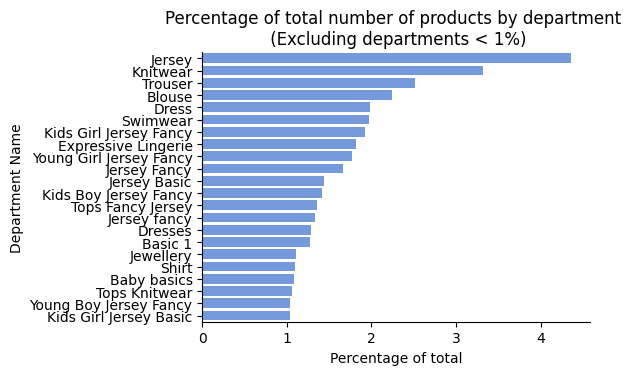

In [25]:
j = articles['department_name'].value_counts(normalize=True).reset_index()
j['perc'] = j['proportion']*100
j[j['proportion']>=0.01]

# Plotting dist by department_name
sns.barplot(j[j['proportion']>=0.01], x='perc', y='department_name',
           color='cornflowerblue')
sns.despine()
plt.title('Percentage of total number of products by department \n (Excluding departments < 1%)')
plt.xlabel('Percentage of total')
plt.ylabel('Department Name')

plt.show();

We do see some department_no have the same name. However, dropping no. and keep the department name as it is seems to still be applicable. In fact, we might want to drop both columns corresponding to department as the information stored is overlapping with other columns (i.e. product_group). We can discuss this in the EDA.

#### section_no and section_name

In [26]:
# Finding product_type_no with more than one unique prod_type_name
(articles.groupby('section_no')['section_name'].nunique()>1).sum()

0

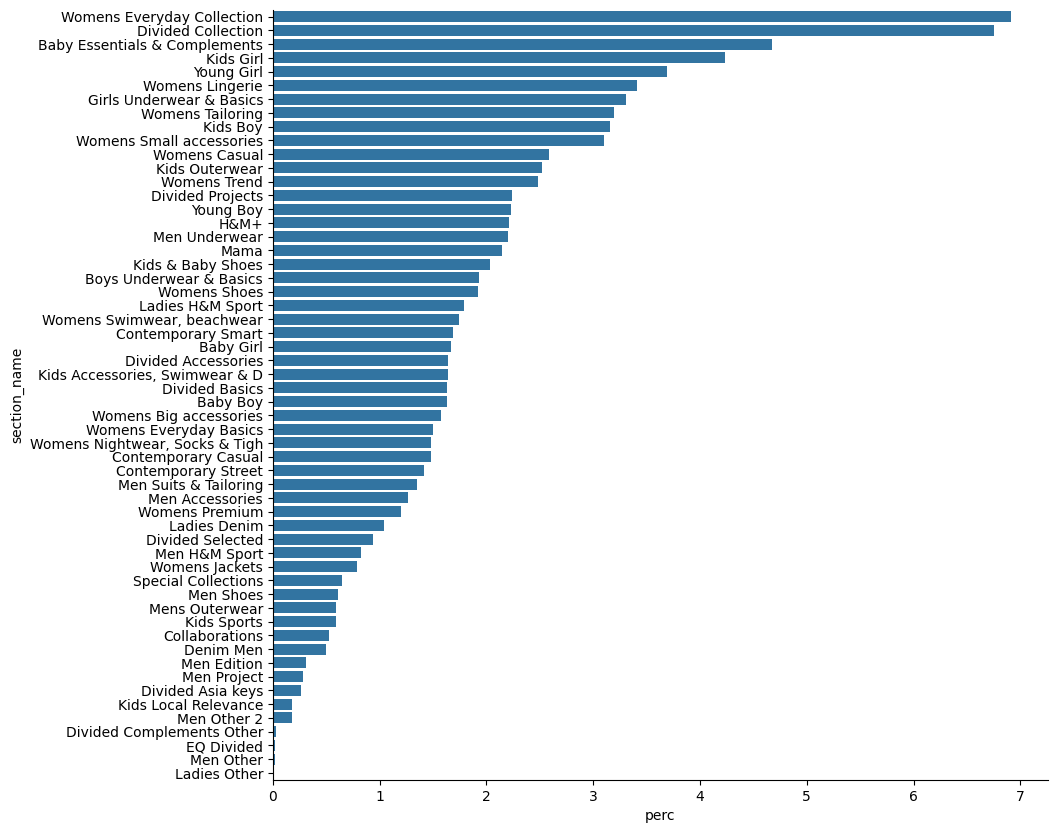

In [27]:
j = articles['section_name'].value_counts(normalize=True).reset_index()
j['perc'] = j['proportion']*100
plt.figure(figsize=(10,10))
sns.barplot(j, x='perc', y='section_name')
sns.despine()

We can drop section_no safely here as well, seems like section would be a column worth keeping by looking at the rather evenly distributed distribution.

---

### Dropping code columns

After looking into the columns and some cleaning, we can now safely drop the "code/no." columns to remove duplicated informations among columns.

In [28]:
# Getting the code columns from the cnpairs_diff dataframe defined earlier
cols_to_drop = cnpairs_diff.iloc[:,0].to_list()
print(cols_to_drop)
print(f'columns before dropping: {articles.shape[1]}')

# Dropping columns
articles.drop(cols_to_drop, axis=1, inplace=True)
print(f'columns after dropping: {articles.shape[1]}')

['product_code', 'product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_code', 'index_group_no', 'section_no', 'garment_group_no']
columns before dropping: 25
columns after dropping: 14


After dropping, we have 14 columns left in the articles table!

---

## Customers

### Shape, missing values, and duplicates

Again, for the customer table, we look at the shape, NANs, and duplicated first.

In [29]:
customers.shape

(1371980, 7)

Over 1.3M of customers, and 7 columns. Much less information here than in the articles table. Let's see if there are useful ones, we can drop those that are not useful.

In [30]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [31]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

We can already see some NaNs here in FN and Active. [Here](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481), we found a comment left by the competition host explaining these two variables:
- **FN**: if a customer get Fashion News newsletter
- **Active**: if the customer is active for communication

In [32]:
customers.duplicated().sum()

0

No duplicated rows.

---

### Imputing missing values

In [33]:
customers['FN'].value_counts()

FN
1.0    476930
Name: count, dtype: int64

In [34]:
customers['Active'].value_counts()

Active
1.0    464404
Name: count, dtype: int64

In [35]:
customers['club_member_status'].value_counts()

club_member_status
ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: count, dtype: int64

- `FN` and `Active` are either 1 or NaN, we would replace the NaN with 0 here.
- `club_member_status` are either ACTIVE, PRE_CREATE, or LEFT CLUB, we can assign NONE to the NaN obs.

In [36]:
# Impute NaNs for FN, Active, and club_member_status 
customers['FN'] = -customers['FN'].isna()
customers['Active'] = -customers['Active'].isna()
customers['club_member_status'] = customers['club_member_status'].fillna('NONE')

In [37]:
customers['fashion_news_frequency'].value_counts()

fashion_news_frequency
NONE         877711
Regularly    477416
Monthly         842
Name: count, dtype: int64

For the `fashion_news_frequency`, we would assign NaNs to the already exist **NONE** category.

In [38]:
# Impute fashion_news_frequency
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('NONE')

---

Next, age is a tricky one. Let's look at the distribution first.

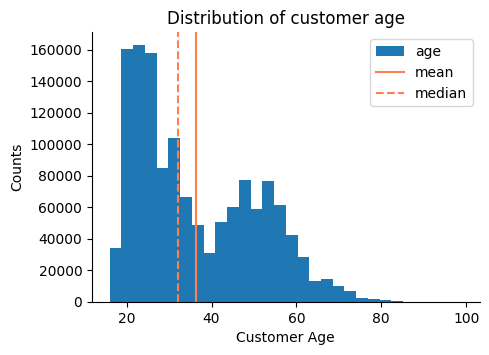

In [39]:
customers['age'].plot(kind='hist', bins=30)
plt.axvline(customers['age'].mean(), 0, 2000, c='coral', label='mean')
plt.axvline(customers['age'].median(), 0, 2000, c='coral', label='median', linestyle='--')
sns.despine()
plt.title('Distribution of customer age')
plt.xlabel('Customer Age')
plt.ylabel('Counts')
plt.legend()
plt.show();

In [40]:
print(customers['age'].isna().sum())
print(customers['age'].isna().mean()*100)

15861
1.1560664149623172


We have 15861 missing values for age, which is around 1.15% of the total observations. Imputing them with median age of all customers might not skew the distribution too much.

In [41]:
# fill NaN for customer age with median
customers['age'] = customers['age'].fillna(customers['age'].median())

Sanity check the distribution:

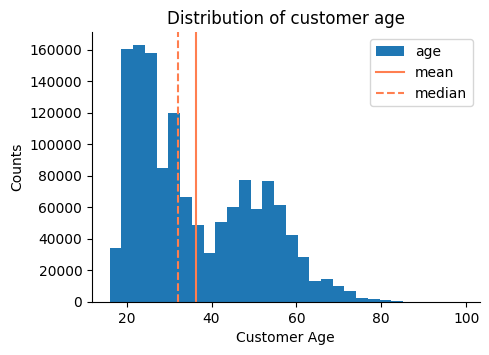

In [42]:
customers['age'].plot(kind='hist', bins=30)
plt.axvline(customers['age'].mean(), 0, 2000, c='coral', label='mean')
plt.axvline(customers['age'].median(), 0, 2000, c='coral', label='median', linestyle='--')
sns.despine()
plt.title('Distribution of customer age')
plt.xlabel('Customer Age')
plt.ylabel('Counts')
plt.legend()
plt.show();

Finally, sanity check if we have dealt with all missing values:

In [43]:
customers.isna().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

**Note**: postal_code seems to be tokenized. We assume it is from all around the globe, hence might be messy. However, it is our only information about customer location. I think we can keep it for now and try to see if any valuable information could be derived from it.

In [44]:
customers['postal_code'].nunique()

352899

In [45]:
(customers['postal_code'].value_counts()<=10).sum()

341957

We have 352k unique postal code. However, 341k of them have less than 10 observations. Hmm... I might want to drop it before modeling, unless we can retrieve more information from the tokenized string.

---

## Transactions

In [46]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


It looks like we only have 5 columns in transactions:
- With **customer_id** we can merge the `customers` table.
- With **article_id** we can merge the `articles` table.
- **price** column here would be our only source if we want to approximate revenue for certain product category or time period (since we don't have price information in the `articles` table).  We don't have informations about the product *costs* as well.
- For **sales_channel_id**, we need to look further into what actual channel the id corresponds to.

### Shape, missing values, and duplicates

In [47]:
transactions.shape

(31788324, 5)

We have 31.7M transactions in our data...Let's check if any of the rows have missing values.

In [48]:
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

Nice, looks clean.  
Checking for duplicated rows:

In [49]:
transactions.duplicated().sum()

2974905

In [50]:
2974905/transactions.shape[0]

0.09358483322367042

It looks like there are quite some duplicated rows (almost 10%)... My assumptions is that since we don't have number of units in the transaction data, the duplicated rows might just be indicating the customer have purchased multiple units of the same items. Let's look into it.

In [51]:
trans_dup = transactions[transactions.duplicated()==True]
trans_dup.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
20,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
21,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
22,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
25,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,676827002,0.042356,2
27,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,685687002,0.016932,2
29,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,680912006,0.016932,2
31,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,692454002,0.025407,2
33,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,640639001,0.010153,2


It does seems like duplicated rows are just multiple units being purchased. We can deal with this by adding a new column **units**, which counts the number of unique transactions of the same duplicates.

In [52]:
# Transforming data by adding units, eliminating duplicated rows.
transactions['units']=0
transactions = transactions.groupby(['t_dat','customer_id', 'article_id', 'price', 'sales_channel_id'])['units'].count().reset_index()

Sanity Check...

In [53]:
transactions.duplicated().sum()

0

In [54]:
transactions[transactions['units']>1]

,t_dat,customer_id,article_id,price,sales_channel_id,units
14,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,377277001,0.008458,2,2
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,2
16,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,2
17,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2,4
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,640639001,0.010153,2,2
...,...,...,...,...,...,...
28813325,2020-09-22,feede16a97612dbe30e7157dce5797b78cab0eda03e146...,919273002,0.042356,2,2
28813362,2020-09-22,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,885315003,0.050102,2,3
28813379,2020-09-22,ff6f55a51af284b71dcd264396b299e548f968c1769e71...,919786002,0.042356,2,2
28813389,2020-09-22,ff94f31e864d9b655643ac4d2adab3611c7241adb5d34c...,901666001,0.084729,2,2


In [55]:
transactions.shape

(28813419, 6)

After transformation, we have around 28.8M actual transactions left, with around 2.5M of them having multiple units. Note that the price here becomes the unit_price, might want to specity that before going further.

In [56]:
transactions = transactions.rename(columns={'price':'unit_price'})
transactions.head()

,t_dat,customer_id,article_id,unit_price,sales_channel_id,units
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,1
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,1


---

### Data types

Let's check if the data types are in correct format.

In [57]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28813419 entries, 0 to 28813418
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   unit_price        float64
 4   sales_channel_id  int64  
 5   units             int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB


Looks like we need to change **t_dat** to datetime format.

In [58]:
# Change t_data foramt to date
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

Sanity check...

In [59]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28813419 entries, 0 to 28813418
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   unit_price        float64       
 4   sales_channel_id  int64         
 5   units             int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.3+ GB


**sales_channel_id** needs some context added. We can actually find information [here](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481), which says "2 is online and 1 is store".
- 2: Online
- 1: Store

In [60]:
transactions['sales_channel_id'].value_counts()

sales_channel_id
2    19686806
1     9126613
Name: count, dtype: int64

It seems like a lot more transactions are made online... Let's add this context to our data:

In [61]:
# Change from (2,1) to (Online, Store)
transactions['sales_channel'] = np.where(transactions['sales_channel_id']==1, 'Store', 'Online')
transactions['sales_channel'].value_counts()

sales_channel
Online    19686806
Store      9126613
Name: count, dtype: int64

In [62]:
# Dropping the sales_channel_id
transactions = transactions.drop('sales_channel_id', axis=1)
transactions.head()

,t_dat,customer_id,article_id,unit_price,units,sales_channel
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1,Online
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,Online
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,1,Online
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,1,Online
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,1,Online


Looks like we are ready to merge the data..

---

## Merging the dataset

Before merging, let's verify the following 2 things:
- What proportion of the unique customer_id in the customers table v.s. in the transactions table
- What proportion of the unique article_id in the artices table v.s. in the transactions table

In [63]:
# proportion of the unique customer_id in the customers table v.s. in the transactions table
transactions['customer_id'].nunique()/customers['customer_id'].nunique()

0.9929306549658158

In [64]:
# proportion of the unique article_id in the articles table v.s. in the transactions table
transactions['article_id'].nunique()/articles['article_id'].nunique()

0.9905724735176518

The proportion matches pretty well, no more than 1% of the ids not there for transactions. We can start merging the data

In [65]:
# Joining the data
temp = transactions.merge(articles, how='left', on='article_id')
hm_sales = temp.merge(customers, how='left', on='customer_id')
hm_sales.head()

,t_dat,customer_id,article_id,unit_price,units,sales_channel,prod_name,product_type_name,product_group_name,graphical_appearance_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1,Online,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,Online,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,1,Online,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Melange,...,Ladieswear,Womens Everyday Collection,Special Offers,V-neck knitted jumper with long sleeves and ri...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [66]:
hm_sales.shape

(28813419, 25)

After merging, verify the following 2 things:
- Are there any customer_id recorded in the transaction table not in customers table?
- Are there any article_id recorded in the transaction table not in articles table?  

We can simply do this by checking for NaNs in any of the columns of customers and articles.

In [67]:
hm_sales['FN'].isna().sum()

0

In [68]:
hm_sales['product_type_name'].isna().sum()

0

No missing values! We can save the merged dataframe now!

In [69]:
# Save the merged files. Blocked code in case running it by accident
# hm_sales.to_csv('data/hm_sales.csv', index=False)

In [21]:
hm_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28813419 entries, 2018-09-20 to 2020-09-22
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   customer_id                   object 
 1   article_id                    int64  
 2   unit_price                    float64
 3   units                         int64  
 4   sales_channel                 object 
 5   prod_name                     object 
 6   product_type_name             object 
 7   product_group_name            object 
 8   graphical_appearance_name     object 
 9   colour_group_name             object 
 10  perceived_colour_value_name   object 
 11  perceived_colour_master_name  object 
 12  department_name               object 
 13  index_name                    object 
 14  index_group_name              object 
 15  section_name                  object 
 16  garment_group_name            object 
 17  detail_desc                   object 
 18  FN    

# Preliminary EDA

In [185]:
hm_sales = pd.read_csv('data/hm_sales.csv')
hm_sales.shape

(28813419, 25)

We already grasp some information from the data cleaning phase... Now we can look further into the data.

## Numeric Columns

In [4]:
numeric_df = hm_sales.select_dtypes('number')
numeric_df.shape

(28813419, 4)

We only have 4 numerical columns, we can ignore the article_id as it should actually be categorical. For the other 3 columns, their distributions can be visualized as follows:

In [5]:
numeric_df = numeric_df.drop('article_id', axis=1)

In [6]:
numeric_df.columns

Index(['unit_price', 'units', 'age'], dtype='object')

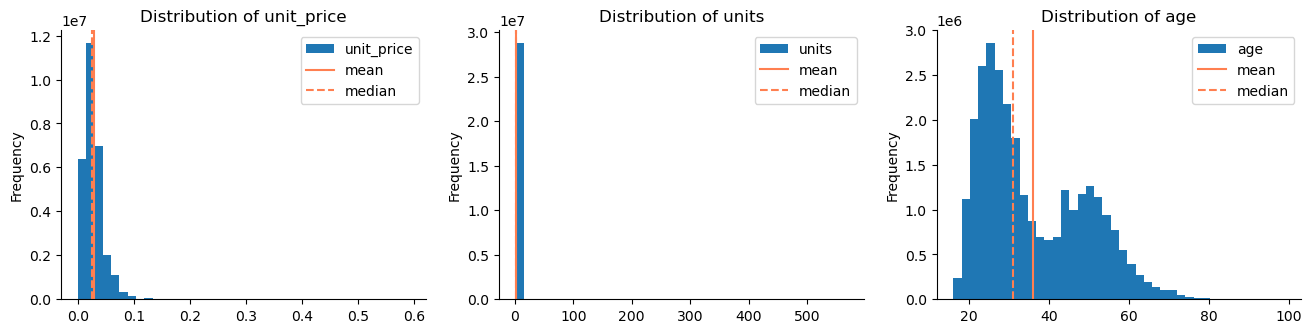

In [7]:
plt.subplots(1,3, figsize=(16,3.5))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(1,3,i+1)
    numeric_df[col].plot(kind='hist', bins = 40)
    
    # plotting mean and median lines
    plt.axvline(numeric_df[col].mean(), 0, 2000, c='coral', label='mean')
    plt.axvline(numeric_df[col].median(), 0, 2000, c='coral', linestyle='--', label='median')
    
    sns.despine()
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.show();   

- Unit price seems to be slightly skewed to the right. The price seems to be scaled already. 
- The majority of the units in each transactions is 1. Transactions are only aggregated with the number of units of each article. It cannot tell if a customer bought multiple different items in one order. We can retrieve this information by grouping t_dat and customer_id. The assumption here is a customer would only make one order maximum each day.
- Two age range can be identified with the most number of transactions: 23-33 and 45-55.

In [8]:
numeric_df['unit_price'].mean()

0.027728679892200424

In [9]:
numeric_df['units'].value_counts()

units
1      26269511
2       2285073
3        177237
4         55412
5          9259
         ...   
63            1
199           1
89            1
86            1
77            1
Name: count, Length: 75, dtype: int64

Let's look at the correlation of the numeric columns

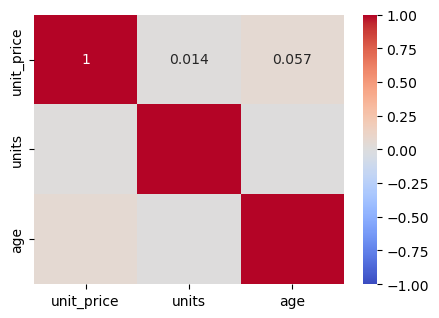

In [10]:
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1);

The correlation between numeric variables are pretty close to 0. 

In [11]:
hm_sales.head()

,t_dat,customer_id,article_id,unit_price,units,sales_channel,prod_name,product_type_name,product_group_name,graphical_appearance_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1,Online,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,Online,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,1,Online,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Melange,...,Ladieswear,Womens Everyday Collection,Special Offers,V-neck knitted jumper with long sleeves and ri...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


## N_transactions by product category

In [12]:
hm_sales.columns[7:18]

Index(['product_type_name', 'product_group_name', 'graphical_appearance_name',
       'colour_group_name', 'perceived_colour_value_name',
       'perceived_colour_master_name', 'department_name', 'index_name',
       'index_group_name', 'section_name', 'garment_group_name'],
      dtype='object')

We have 11 product related variables that can be used as segments.

In [13]:
hm_sales.iloc[:,7:18].nunique()

product_type_name               130
product_group_name               19
graphical_appearance_name        30
colour_group_name                50
perceived_colour_value_name       8
perceived_colour_master_name     20
department_name                 250
index_name                       10
index_group_name                  5
section_name                     56
garment_group_name               21
dtype: int64

For preliminary EDA we would like to look at a higher level category. In this case, We might want to look at product_group_name, index_name, or index_group_name.

Let's look into how classes are distributed among the three columns.

In [14]:
prod_seg = hm_sales[['product_group_name','index_name', 'index_group_name']]

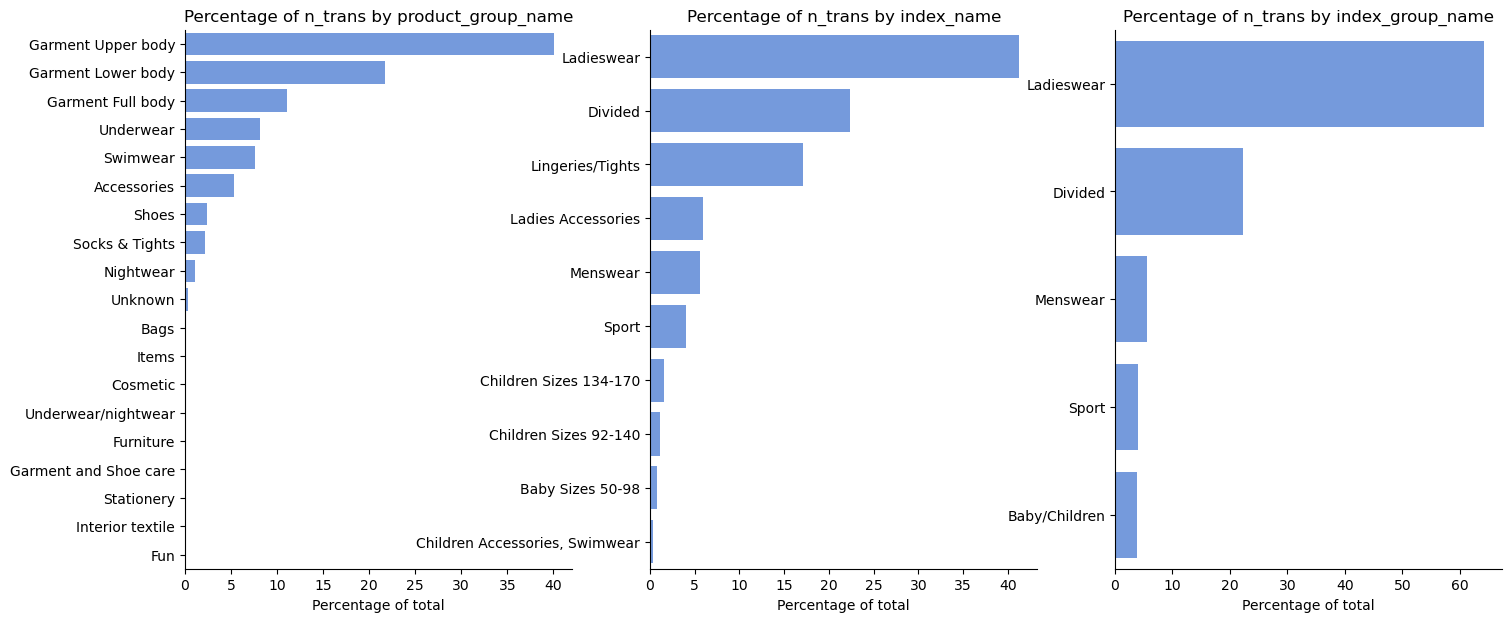

In [15]:
plt.subplots(1,3, figsize=(17,7))
for i, col in enumerate(prod_seg.columns):
    plt.subplot(1,3,i+1)
    j = prod_seg[col].value_counts(normalize=True).to_frame().reset_index()
    j['perc'] = j['proportion']*100
    
    # Plotting dist by segments
    sns.barplot(j, x='perc', y=col,
               color='cornflowerblue')
    sns.despine()
    plt.title(f'Percentage of n_trans by {col}')
    plt.xlabel('Percentage of total')
    plt.ylabel(None)

plt.show();  

- Hierarchies can be seen from categorical variables that is related to products, might need feature engineering.
- Over 60% of the transactions are **Ladieswaer** according to index_group_name.


In [16]:
prod_seg.groupby(['index_group_name', 'index_name']).count().sort_values(['index_group_name','product_group_name'], ascending=False)

product_group_name
index_group_name index_name                                        
Sport            Sport                                      1148763
Menswear         Menswear                                   1608839
Ladieswear       Ladieswear                                11882578
                 Lingeries/Tights                           4920372
                 Ladies Accessories                         1692785
Divided          Divided                                    6440803
Baby/Children    Children Sizes 134-170                      461455
                 Children Sizes 92-140                       319675
                 Baby Sizes 50-98                            239709
                 Children Accessories, Swimwear               98440

- **Ladieswear** and **Baby/Children** have subcategories.

## Time Series

To conduct time series EDA it would be easier if we set date as index first.

In [17]:
hm_sales['t_dat'] = pd.to_datetime(hm_sales['t_dat'])
hm_sales = hm_sales.set_index('t_dat')
hm_sales.head()

,customer_id,article_id,unit_price,units,sales_channel,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
t_dat,,,,,,,,,,,,,,,,,,,,,
2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1,Online,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,Light Pink,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,Online,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,Black,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,Grey,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,Pink,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,1,Online,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Melange,Dark Grey,...,Ladieswear,Womens Everyday Collection,Special Offers,V-neck knitted jumper with long sleeves and ri...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [18]:
hm_sales_monthly = hm_sales[['customer_id', 'units']].resample('MS').count()
hm_sales_monthly.head()

,customer_id,units
t_dat,,
2018-09-01,542680,542680
2018-10-01,1271899,1271899
2018-11-01,1158527,1158527
2018-12-01,1046956,1046956
2019-01-01,1127415,1127415


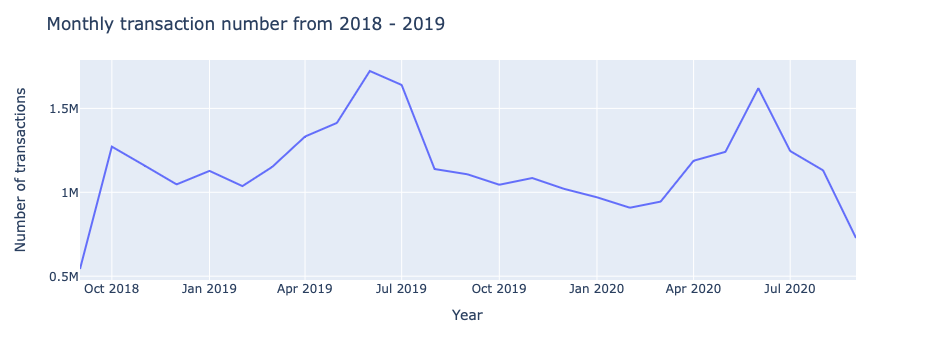

In [30]:
fig = px.line(hm_sales_monthly, x=hm_sales_monthly.index, y="units",)
fig.update_layout(
    yaxis_title="Number of transactions", 
    xaxis_title="Year",
    legend_title="", 
    title="Monthly transaction number from 2018 - 2019"
)
fig.show();

In [20]:
# fig.write_html('sales.html')

We can spot a seasonal trend here, with number of transactions peaked at June each year.

# Next Steps

Here we breifly sum up the preliminary EDA with some future works:
- Feature Engineering Oppurtunities
    - Transactions are only aggregated with the number of units of each article. It cannot tell if a customer bought multiple different items in one order. We can retrieve this information by grouping t_dat and customer_id. The assumption here is a customer would only make one order maximum each day.
    - Hierarchies can be seen from categorical variables that is related to products, might need feature engineering.
    - As we are doing demand forecasting for the project, we need to create a lag feature of the time series
- More EDA
    - We haven't thoroughly look into all the categorical variables, maybe we can determine some key variables and drop those that are redundant after we figure out the hierarchies.
    - We may want to look into individual product groups and see if there are differences in customer demographics. (Kmeans)

The goal for the next step EDA is to determine which attributes effects sales (n_transactions) the most. We might come up with a plotly dashboard in the next step to grasp an overall picture of our data.

# --------- Sprint 2 -----------

# EDA - Product Analysis and Preprocessing

In [21]:
hm_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28813419 entries, 2018-09-20 to 2020-09-22
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   customer_id                   object 
 1   article_id                    int64  
 2   unit_price                    float64
 3   units                         int64  
 4   sales_channel                 object 
 5   prod_name                     object 
 6   product_type_name             object 
 7   product_group_name            object 
 8   graphical_appearance_name     object 
 9   colour_group_name             object 
 10  perceived_colour_value_name   object 
 11  perceived_colour_master_name  object 
 12  department_name               object 
 13  index_name                    object 
 14  index_group_name              object 
 15  section_name                  object 
 16  garment_group_name            object 
 17  detail_desc                   object 
 18  FN    

## Product Categories

In [88]:
pc_cols = ['product_type_name','product_group_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'prod_name']
for col in pc_cols:
    print(col)

product_type_name
product_group_name
department_name
index_name
index_group_name
section_name
garment_group_name
prod_name


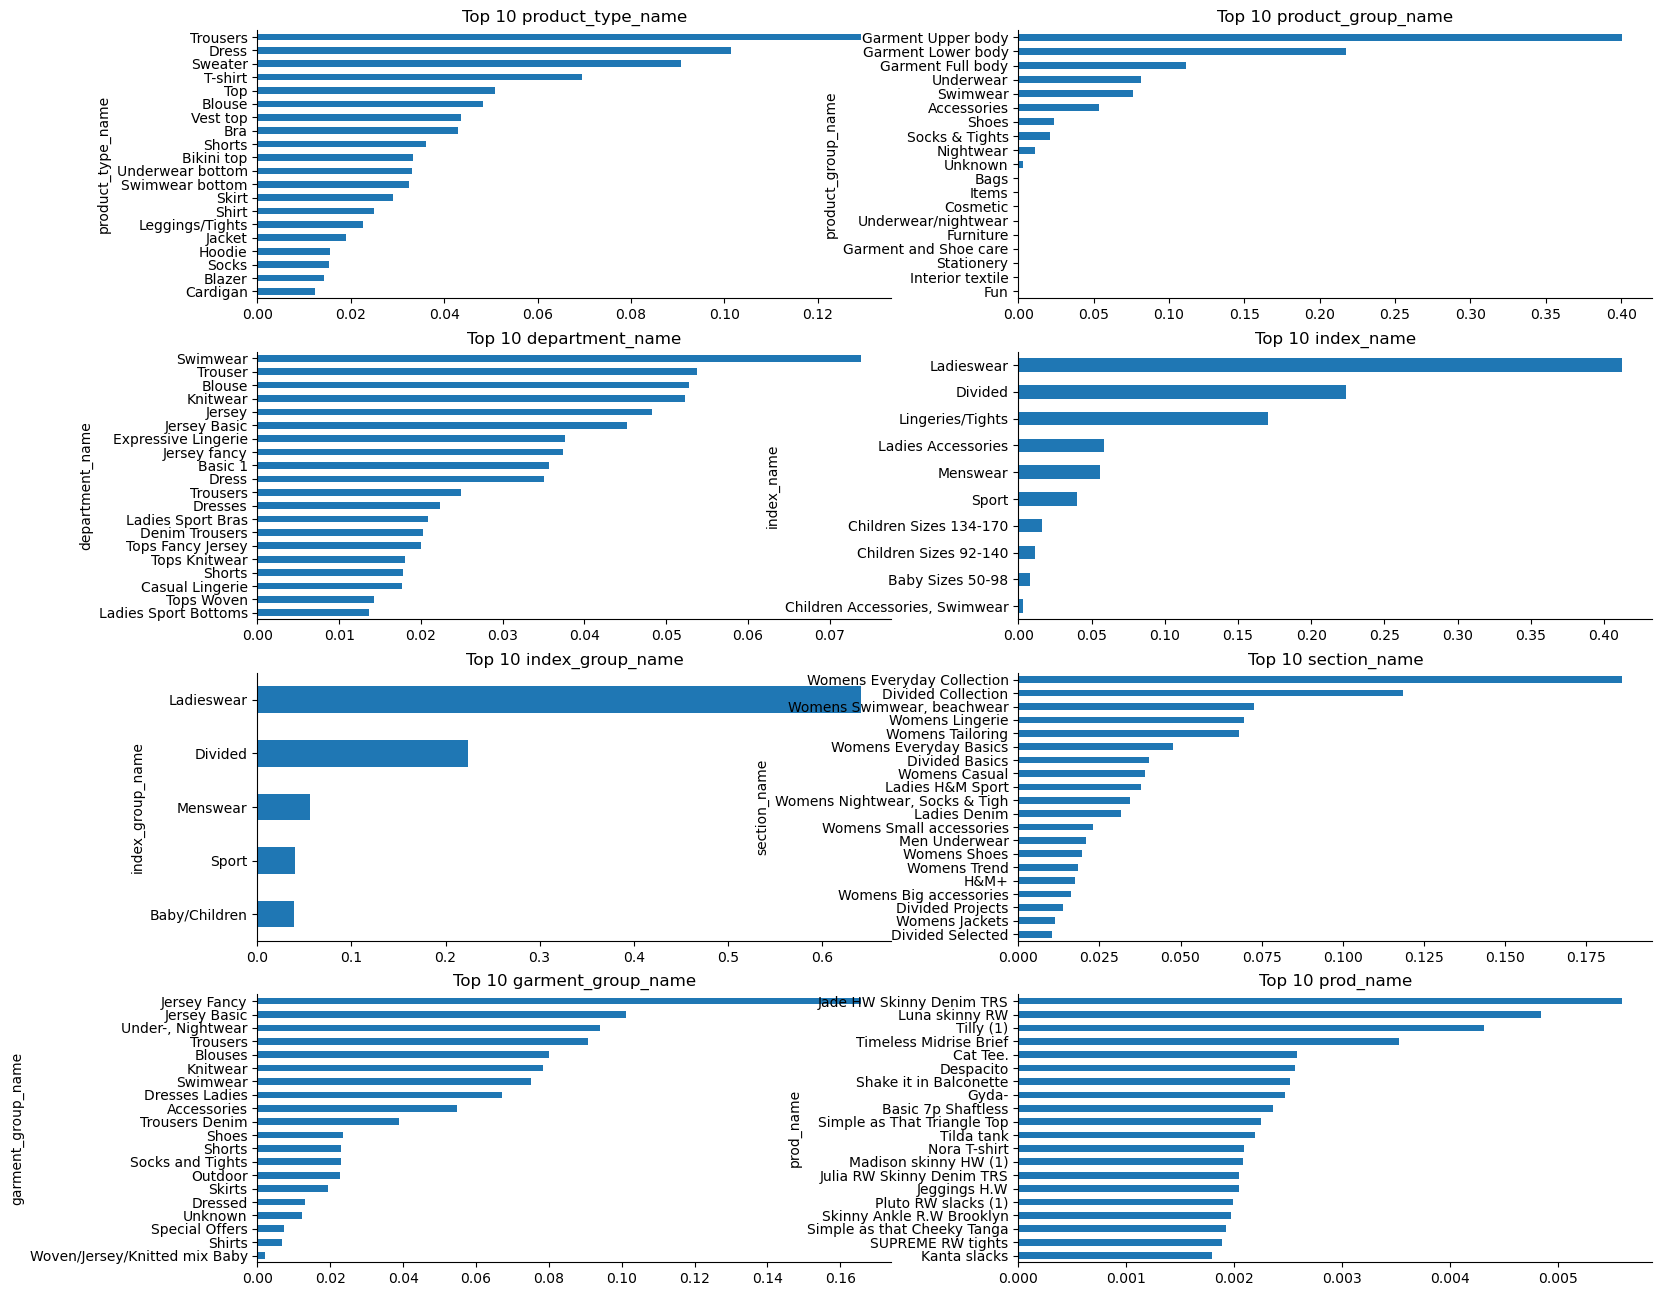

In [116]:
# Visualize appearance columns sort by n_transactions
plt.subplots(4, 2, figsize=(18,16))
for i, col in enumerate(pc_cols):
    plt.subplot(4, 2, i+1)
    hm_sales[col].value_counts(normalize=True).head(20).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Top 10 {col}')
    # plt.xlabel('Percentage of Total')
    sns.despine()
plt.show();

We have 7 columns that is related with product categories, let's see the hierarchies in them:

### index_group_name v.s. index_name

As we've already seen in the previous EDA, we know that `index_group_name` has a subset called `index_name`

In [120]:
hm_sales.groupby('index_group_name')['index_name'].unique().reset_index()

,index_group_name,index_name
0,Baby/Children,"[Baby Sizes 50-98, Children Sizes 92-140, Chil..."
1,Divided,[Divided]
2,Ladieswear,"[Lingeries/Tights, Ladieswear, Ladies Accessor..."
3,Menswear,[Menswear]
4,Sport,[Sport]


Here, `index_group_name` seems to be enough of the context we want. For simlicity we would want to drop `index_name`. Here we set a list for columns to be dropped and drop them at once later.

In [123]:
# Preprocess parameters - place holder for columns to be dropped
cols_to_drop = ['index_name']
cols_to_drop

['index_name']

### Product_group_name and product_type_name

Here we basically look at the two category and their relation ship with product name. We would like to know:
- How many products are within each product group?
- Is product_type_name a subset of product_group_name?
- Should we limit to only a few of the product groups for the scope of this project?

**How many products are within each product group**

In [136]:
product_group_count = hm_sales.groupby('product_group_name')['prod_name'].nunique().sort_values(ascending=False).reset_index().rename(columns={'prod_name':'n_unique_product'})
product_group_count['perc'] = product_group_count['n_unique_product']/hm_sales['prod_name'].nunique()
product_group_count

,product_group_name,n_unique_product,perc
0,Garment Upper body,15904,0.368617
1,Garment Lower body,7853,0.182014
2,Garment Full body,6531,0.151373
3,Accessories,5986,0.138741
4,Shoes,2522,0.058454
5,Underwear,1955,0.045312
6,Swimwear,1324,0.030687
7,Nightwear,636,0.014741
8,Socks & Tights,634,0.014695
9,Unknown,61,0.001414


- Here we can see that a lot of product groups contains less than 1% of the total products. We would consider dropping them.

In [143]:
# shape before dropping the rows
hm_sales.shape

(28813419, 25)

In [142]:
# dropping the rows in groups with less than 1% product
product_group_list = product_group_count[product_group_count['perc'] > 0.01]['product_group_name'].to_list()

# shape after dropping the rows
hm_sales[hm_sales['product_group_name'].isin(product_group_list)].shape

(28712292, 25)

**Is product_type_name a subset of product_group_name**

In [146]:
hm_sales.groupby(['product_group_name', 'product_type_name'])['prod_name'].nunique().reset_index().head(10)

,product_group_name,product_type_name,prod_name
0,Accessories,Accessories set,3
1,Accessories,Alice band,6
2,Accessories,Baby Bib,1
3,Accessories,Bag,756
4,Accessories,Beanie,28
5,Accessories,Belt,279
6,Accessories,Bracelet,139
7,Accessories,Braces,2
8,Accessories,Bucket hat,7
9,Accessories,Cap,8


We can see that product_group_name is a superset of product_type_name. We will keep them both for now. Just a note that we might need further NLP with product type name.

Finally, as we have so many product in our data. We might want to limit the scope of this project to look at only a few groups from product group.

**Limit the scope of the project to a few product groups**

Let's look at categories within the product group 'Garment Upper body'

In [148]:
# Filter group Garment Upper body and print unique values of category columns
for col in pc_cols:
    print(f'-------- {col}----------')
    print(hm_sales[hm_sales['product_group_name']=='Garment Upper body'][col].unique())

-------- product_type_name----------
['Sweater' 'Blouse' 'Cardigan' 'Vest top' 'T-shirt' 'Top' 'Shirt' 'Jacket'
 'Hoodie' 'Bodysuit' 'Polo shirt' 'Coat' 'Blazer' 'Tailored Waistcoat'
 'Outdoor Waistcoat']
-------- product_group_name----------
['Garment Upper body']
-------- department_name----------
['Tops Knitwear DS' 'Campaigns' 'Blouse' 'Tops Knitwear' 'Basic 1'
 'Projects Jersey & Knitwear' 'Jersey Fancy DS' 'Jersey'
 'Tops Fancy Jersey' 'Kids Boy Knitwear' 'Jersey fancy' 'Knitwear'
 'Ladies Sport Bras' 'Jersey Fancy' 'Kids Girl Jersey Fancy'
 'Kids Girl Knitwear' 'Young Girl Knitwear' 'Outwear' 'Jersey Basic'
 'Outdoor/Blazers' 'Kids Boy Jersey Fancy' 'Baby Girl Jersey Fancy'
 'Young Girl Jersey Basic' 'Knitwear Basic' 'Tops Woven' 'Suit jacket'
 'Suit' 'Kids Boy Outdoor' 'Loungewear' 'Jersey Occasion' 'Read & React'
 'Baby Exclusive' 'Woven top' 'Baby basics' 'Newborn' 'Woven Occasion'
 'Baby Girl Knitwear' 'Baby Boy Jersey Fancy' 'Baby Girl Woven'
 'Outdoor inactive from s1' 'Ja

We might want to drop department name as there seems to be too many false informatino stored with context irrelavant to the product category. Let's give it a check:

In [153]:
hm_sales[hm_sales['product_group_name']=='Garment Upper body'].groupby(['product_type_name','department_name'])['prod_name'].nunique().reset_index().head(10)

,product_type_name,department_name,prod_name
0,Blazer,AK Dresses & Outdoor,5
1,Blazer,Asia Assortment,1
2,Blazer,Baby Boy Woven,1
3,Blazer,Blazer,90
4,Blazer,Blazer S&T,44
5,Blazer,Blouse & Dress,3
6,Blazer,Boys Local Relevance,3
7,Blazer,Campaigns,3
8,Blazer,Conscious Exclusive,4
9,Blazer,Denim wardrobe H&M man inactive from S.6,14


Also we check the same thing with garment_group_name.

In [154]:
hm_sales[hm_sales['product_group_name']=='Garment Upper body'].groupby(['product_type_name','garment_group_name'])['prod_name'].nunique().reset_index().head(10)

,product_type_name,garment_group_name,prod_name
0,Blazer,Blouses,4
1,Blazer,Dressed,373
2,Blazer,Dresses Ladies,13
3,Blazer,Jersey Fancy,4
4,Blazer,Outdoor,80
5,Blazer,Shirts,38
6,Blazer,Special Offers,12
7,Blazer,Trousers,3
8,Blazer,Unknown,48
9,Blazer,Woven/Jersey/Knitted mix Baby,1


For the simlicity of this project, I will make a call here to drop these to columns.o

In [156]:
# Update Preprocess parameters
cols_to_drop.append('department_name')
cols_to_drop.append('garment_group_name')
cols_to_drop

['index_name', 'department_name', 'garment_group_name']

As for the product groups to keep within the scope of this project, we refer to the sales with top 5 sales. As we are selecting only the product group with top 5 sales, we no longer need to remove the groups with less than 1% of total products.

In [164]:
# Preprocess parameters
groups_to_keep = hm_sales['product_group_name'].value_counts().head(5).index.to_list()
groups_to_keep

['Garment Upper body',
 'Garment Lower body',
 'Garment Full body',
 'Underwear',
 'Swimwear']

## Appearance - colours and graphical appe

Let's look at some colors!

In [22]:
hm_sales['colour_group_name'].unique()

array(['Light Pink', 'Black', 'Grey', 'Pink', 'Dark Grey', 'Dark Green',
       'Dark Red', 'Turquoise', 'Light Beige', 'Yellow', 'Red',
       'Light Grey', 'White', 'Blue', 'Dark Blue', 'Dark Beige', 'Beige',
       'Light Orange', 'Light Purple', 'Off White', 'Greenish Khaki',
       'Other Pink', 'Dark Turquoise', 'Dark Pink', 'Greyish Beige',
       'Light Blue', 'Orange', 'Other Red', 'Dark Yellow', 'Light Yellow',
       'Light Turquoise', 'Green', 'Silver', 'Other Blue', 'Gold',
       'Dark Purple', 'Other', 'Dark Orange', 'Yellowish Brown',
       'Other Purple', 'Light Green', 'Other Orange', 'Other Green',
       'Purple', 'Light Red', 'Transparent', 'Other Yellow', 'Unknown',
       'Other Turquoise', 'Bronze/Copper'], dtype=object)

In [23]:
hm_sales['graphical_appearance_name'].unique()

array(['Solid', 'Melange', 'All over pattern', 'Check', 'Front print',
       'Placement print', 'Lace', 'Denim', 'Treatment', 'Stripe', 'Dot',
       'Contrast', 'Colour blocking', 'Jacquard', 'Other structure',
       'Embroidery', 'Other pattern', 'Glittering/Metallic', 'Neps',
       'Mixed solid/pattern', 'Application/3D', 'Transparent', 'Metallic',
       'Sequin', 'Chambray', 'Argyle', 'Unknown', 'Slub', 'Mesh',
       'Hologram'], dtype=object)

In [24]:
hm_sales['perceived_colour_value_name'].unique()

array(['Dusty Light', 'Dark', 'Medium Dusty', 'Medium', 'Bright', 'Light',
       'Undefined', 'Unknown'], dtype=object)

In [25]:
hm_sales['perceived_colour_master_name'].unique()

array(['Pink', 'Black', 'Unknown', 'Grey', 'Green', 'Red', 'Turquoise',
       'Beige', 'Yellow', 'White', 'Blue', 'Brown', 'Orange',
       'Lilac Purple', 'Khaki green', 'Mole', 'Metal', 'undefined',
       'Yellowish Green', 'Bluish Green'], dtype=object)

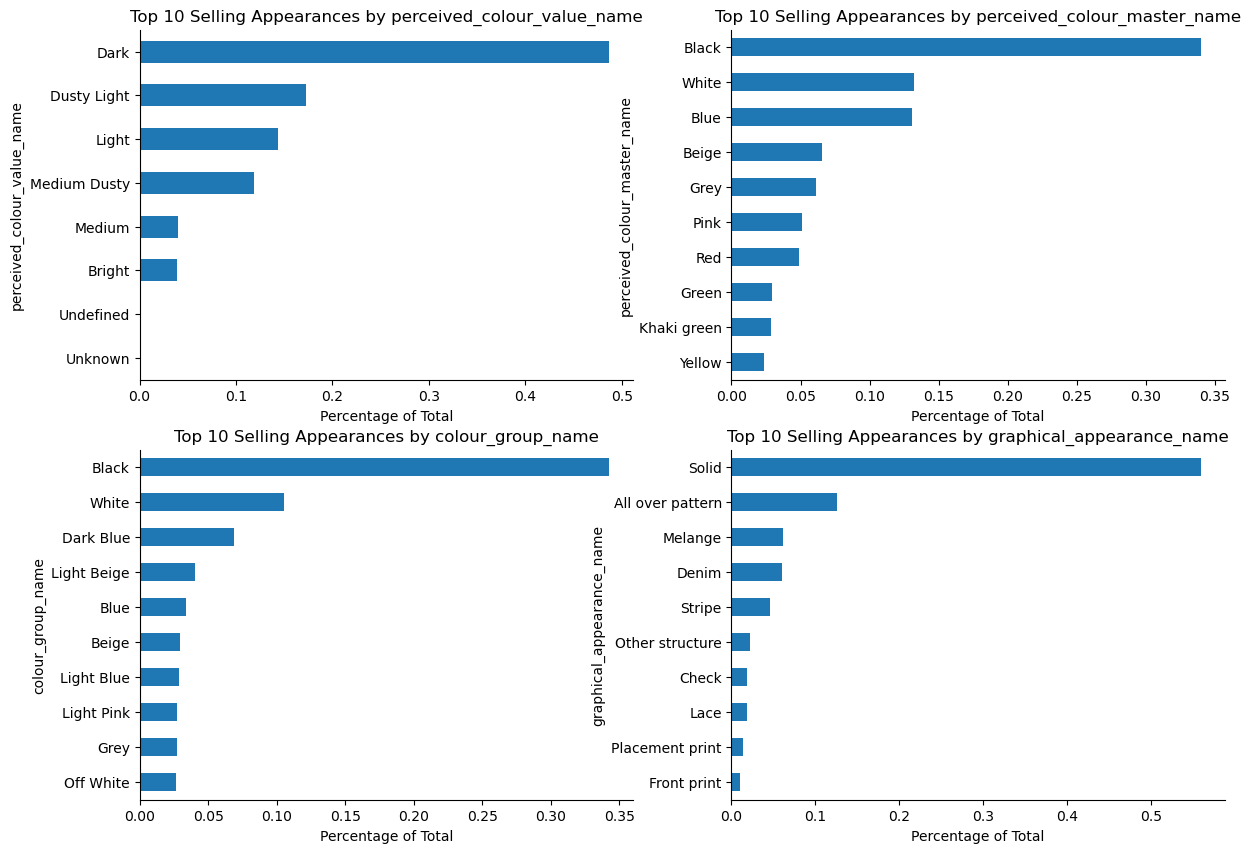

In [55]:
# select columns that are related to products appearance
appearance_cols = ['perceived_colour_value_name', 'perceived_colour_master_name', 'colour_group_name', 'graphical_appearance_name']

# Visualize appearance columns sort by n_transactions
plt.subplots(2, 2, figsize=(14,10))
for i, col in enumerate(appearance_cols):
    plt.subplot(2, 2, i+1)
    hm_sales[col].value_counts(normalize=True).head(10).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f'Top 10 Selling Appearances by {col}')
    plt.xlabel('Percentage of Total')
    sns.despine()
plt.show();

**Notes**
- Black, white, blue, beige, and grey are the most selling colors, with black accumulating over 30% of total sales.
- Solid is a clear win in graphical appearance, with over 50% of total sales.
- We see that green, khak green, light blue, and light pink comes up in the top 10 as well, this might be an indicator of seasonal trend.
- Dark colours are more popular compared to lighter ones.

In [168]:
color_group = hm_sales.groupby(['perceived_colour_master_name', 'colour_group_name']).count().sort_values('perceived_colour_master_name')['customer_id'].reset_index()
color_group = color_group.rename(columns={'customer_id':'counts'})

In [175]:
color_group[color_group['perceived_colour_master_name']=='Khaki green']

,perceived_colour_master_name,colour_group_name,counts
60,Khaki green,Dark Beige,4166
61,Khaki green,Dark Green,68833
62,Khaki green,Dark Yellow,5981
63,Khaki green,Green,47285
64,Khaki green,Greenish Khaki,695761
65,Khaki green,Greyish Beige,3664


In [173]:
color_group[color_group['colour_group_name']=='White']

,perceived_colour_master_name,colour_group_name,counts
129,Unknown,White,93477
139,White,White,2942931


**Preprocess Notes**
- perceived_colour_master_name seems to be a superset for colour_group_name. We might want to keep the former one as it already conveys enough information.
- perceived_colour_value_name seems to have a large difference between light and dark. We might just want to transform it to column `is_dark` with boolean.

In [176]:
cols_to_drop.append('colour_group_name')
cols_to_drop

['index_name', 'department_name', 'garment_group_name', 'colour_group_name']

In [179]:
# create is_dark column
is_dark = np.where(hm_sales['perceived_colour_value_name']=='Dark', 1, 0)

# Sanity check
(is_dark==1).sum()/is_dark.shape[0]

0.4871882784892692

In [180]:
cols_to_drop.append('perceived_colour_value_name')
cols_to_drop

['index_name',
 'department_name',
 'garment_group_name',
 'colour_group_name',
 'perceived_colour_value_name']

## Preprocessing

Here, we omit our data based on the previous EDA with the following steps:  
- [X]  drop cols_to_drop
- [X]  drop product group with less than 1% of products
- [X]  select only a few product groups
- [X]  Add column is_dark

In [189]:
# Drop columns
print(f'columns before dropping: {hm_sales.shape[1]}')
hm_sales_processed = hm_sales.drop(cols_to_drop, axis=1)
print(f'columns after dropping: {hm_sales_processed.shape[1]}')

columns before dropping: 25
columns after dropping: 20


In [187]:
# Adding column is_dark
hm_sales_processed['is_dark'] = is_dark
hm_sales_processed.columns

Index(['t_dat', 'customer_id', 'article_id', 'unit_price', 'units',
       'sales_channel', 'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'perceived_colour_master_name',
       'index_group_name', 'section_name', 'detail_desc', 'FN', 'Active',
       'club_member_status', 'fashion_news_frequency', 'age', 'postal_code',
       'is_dark'],
      dtype='object')

In [188]:
hm_sales_processed['is_dark'].value_counts(normalize=True)

is_dark
0    0.512812
1    0.487188
Name: proportion, dtype: float64

In [190]:
# Select only rows of interested product group
print(f'groups to keep :{groups_to_keep}')
print(f'rows before dropping: {hm_sales_processed.shape[0]}')
hm_sales_processed = hm_sales_processed[hm_sales_processed['product_group_name'].isin(groups_to_keep)]
print(f'rows after dropping: {hm_sales_processed.shape[0]}')

groups to keep :['Garment Upper body', 'Garment Lower body', 'Garment Full body', 'Underwear', 'Swimwear']
rows before dropping: 28813419
rows after dropping: 25547159


In [191]:
# number of product_types 
hm_sales_processed['product_type_name'].nunique()

43

We've successfully reduced product type within our scope while not reducing a lot of transactions. Next, we will look into sales analysis by number of transactions.

In [192]:
# Save the processed files. Blocked code in case running it by accident
hm_sales_processed.to_csv('data/hm_sales_processed.csv', index=False)

# EDA - Sales Analysis (Time Series)

Here we are going to pick some of the top selling items, normalling selling items, and some of the items that perform not that well on sellings. We are going to explore the sales trend by time and see if there are similarities and differences for different performing products. Steps are as follows:

- [X] Pick items (`prod_name`) to explore:
    - [ ] (Binning the products by sales performance)
    - [X] Randomly select products from different tiers (let's say 3-5 products for each tiers)
- [X] Aggregate with WEEK cyclicity and visualize
- [ ] Find insights

### Analyzing top performing products

Let's start by doint it with one product, we can choose the top selling product as our example:

In [284]:
# selecting top selling product as sample_product
top_prod = hm_sales_processed['prod_name'].mode().iloc[0]
print(f'top product: {top_prod}')

# filter df
df = hm_sales_processed[hm_sales_processed['prod_name']==top_prod]

# Calculate the percentage of sales for this product compared to tatal
prod_sales_pct = round(df.shape[0]*100/ hm_sales_processed.shape[0],2)
print(f'Percentage of Sales: {prod_sales_pct}%')

# timeseries prep
df['t_dat']=pd.to_datetime(df['t_dat'])
df = df.set_index('t_dat')

# Keeping only units column
df = df.loc[:,['units']] 

# Aggregate by week
df = df.resample('W').sum()
df.head()

top product: Jade HW Skinny Denim TRS
Percentage of Sales: 0.63%


,units
t_dat,
2018-11-04,10
2018-11-11,32
2018-11-18,41
2018-11-25,149
2018-12-02,373


n_transactions for 'Jade HW Skinny Denim TRS' attributed 0.63% of total transactions. Let's visualize the sales over time for this product:

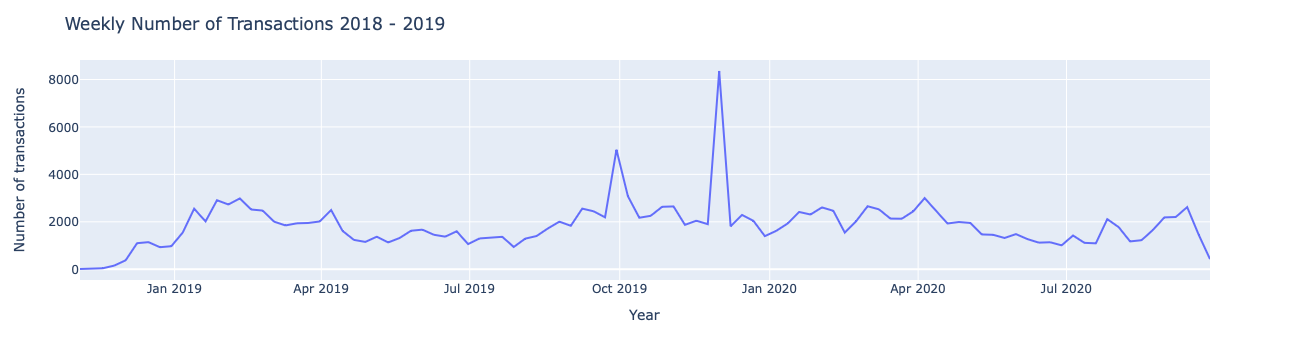

In [282]:
# looking at the sales for this product over time
fig = px.line(df, x=df.index, y="units",)
fig.update_layout(
    yaxis_title="Number of transactions", 
    xaxis_title="Year",
    legend_title="", 
    title="Weekly Number of Transactions 2018 - 2019"
)
fig.show();

We can observe obvious spikes during the week of '2019.09.29' and '2019.12.01'. Let's see if we can calculate weekly growth rate for the product.

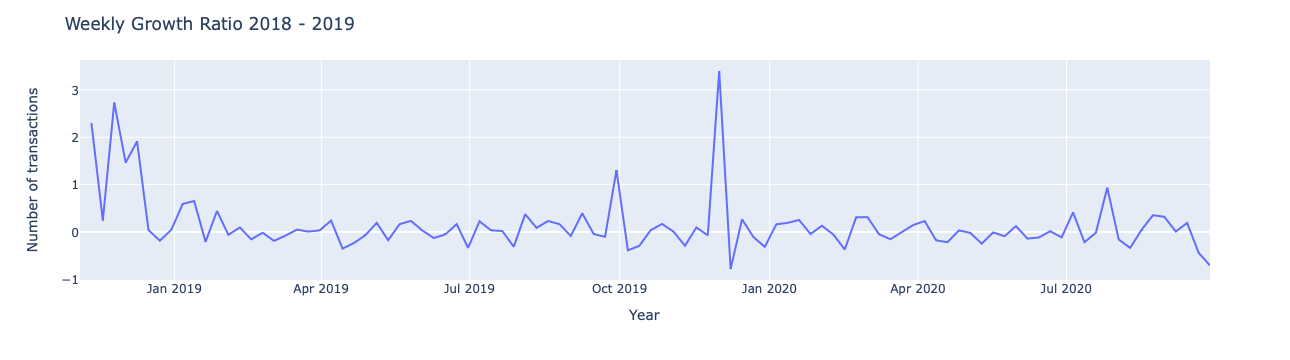

In [283]:
# Looking at percentage difference by weeks
df['%growth'] = df['units'].pct_change()

# Visualize growth % by time
fig = px.line(df, x=df.index, y="%growth",)
fig.update_layout(
    yaxis_title="Number of transactions", 
    xaxis_title="Year",
    legend_title="", 
    title="Weekly Growth Ratio 2018 - 2019"
)
fig.show();

The growth rate does captures the two spikes that we were observing. However, we can see that the growth rate are also high in the beginning when we have less items.

### Analyzing selected random products

In [298]:
# selecting another sample product randomly
samp_prod =  hm_sales_processed['prod_name'].value_counts().reset_index().iloc[13894,0]
print(f'random product: {samp_prod}')

# filter df
df = hm_sales_processed[hm_sales_processed['prod_name'] == samp_prod]

# Calculate the percentage of sales for this product compared to tatal
prod_sales_pct = round(df.shape[0]*100/ hm_sales_processed.shape[0],4)
print(f'Percentage of Sales: {prod_sales_pct}%')

# timeseries prep
df['t_dat']=pd.to_datetime(df['t_dat'])
df = df.set_index('t_dat')

# Keeping only units column
df = df.loc[:,['units']] 

# Aggregate by week
df = df.resample('W').sum()
df.head()

random product: PE AGNES TOP 3
Percentage of Sales: 0.0007%


,units
t_dat,
2018-11-11,1
2018-11-18,0
2018-11-25,4
2018-12-02,4
2018-12-09,4


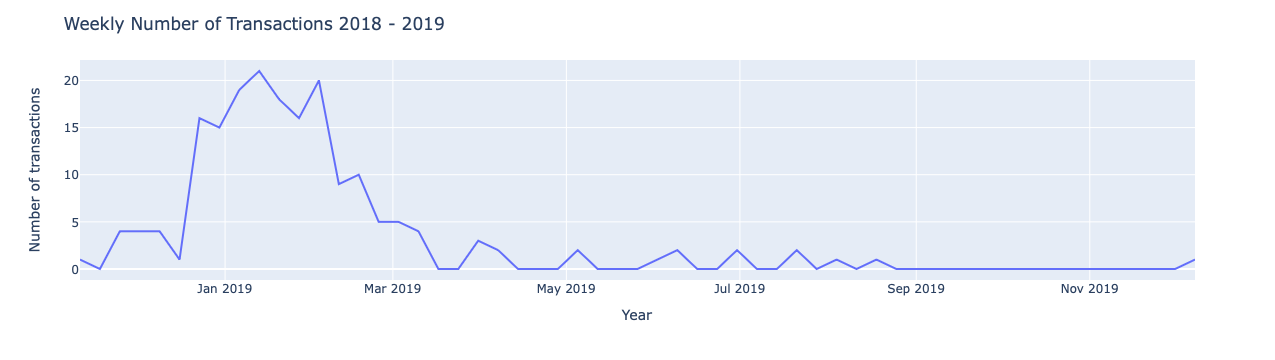

In [299]:
# looking at the sales for this product over time
fig = px.line(df, x=df.index, y="units",)
fig.update_layout(
    yaxis_title="Number of transactions", 
    xaxis_title="Year",
    legend_title="", 
    title="Weekly Number of Transactions 2018 - 2019"
)
fig.show();

In [300]:
# Looking at percentage difference by weeks
df['%growth'] = df['units'].pct_change()

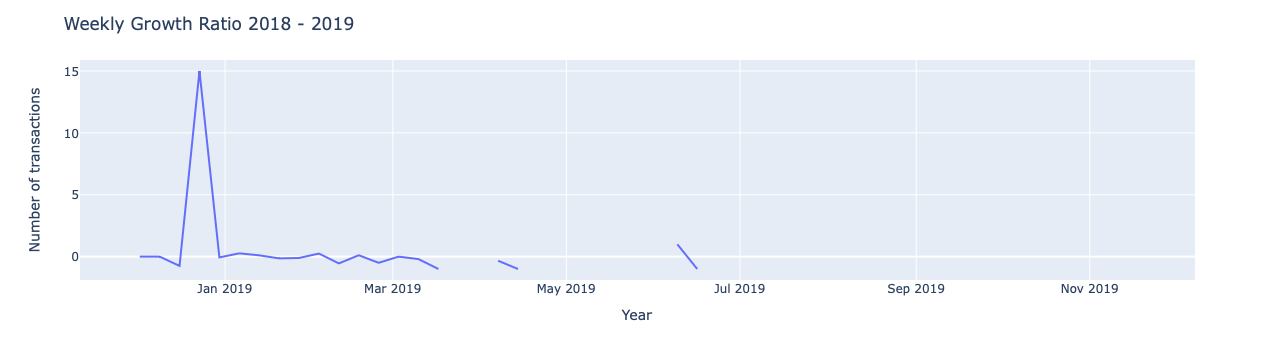

In [301]:
# Visualize growth % by time
fig = px.line(df, x=df.index, y="%growth",)
fig.update_layout(
    yaxis_title="Number of transactions", 
    xaxis_title="Year",
    legend_title="", 
    title="Weekly Growth Ratio 2018 - 2019"
)
fig.show();

Here we do see some gaps in the growth rate, that's because there are weeks that have 0 sales. We mights want to deal with this. we can set growth rate as 0 for those missing values.

In [305]:
# replace growth rate with NaN and inf, -inf as 0
df['%growth'] = np.where((df['%growth'].isna()) | (df['%growth'].isin([float('inf'), float('-inf')])), 0, df['%growth'])

# Sanity check
print(df.isna().sum())
print((df['%growth'].isin([float('inf'), float('-inf')])).sum())

units      0
%growth    0
dtype: int64
0


Let's visualize the growth again:

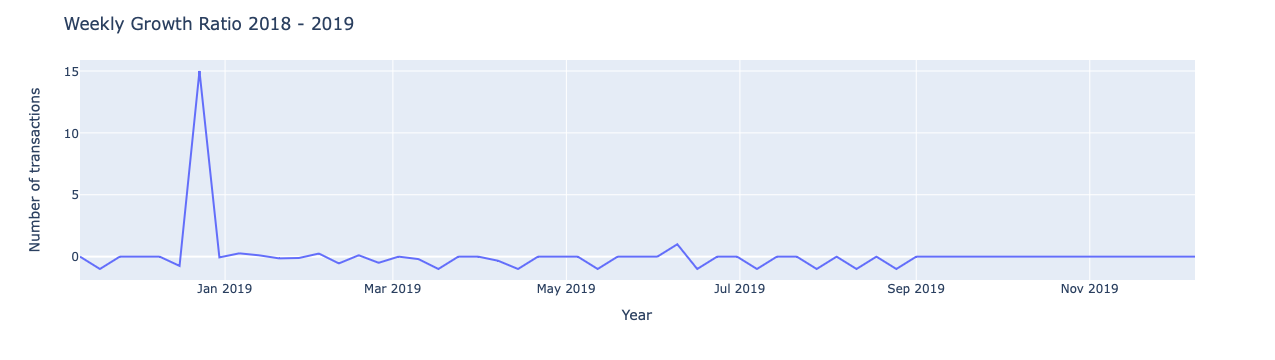

In [306]:
# Visualize growth % by time
fig = px.line(df, x=df.index, y="%growth",)
fig.update_layout(
    yaxis_title="Number of transactions", 
    xaxis_title="Year",
    legend_title="", 
    title="Weekly Growth Ratio 2018 - 2019"
)
fig.show();

# Feature Engineering

## Target Variable - Trending

For our target variable "trending", we are going to engineer it with our dataset, it is going to be a boolean value of whether it has a spike in sales (threshold calculated by the growth percentage from last week) in the product life time.

We will use the calculation of '%growth' in the previous sections to achieve this.